In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
import numpy as np
#rc('text', usetex=True)
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.rm'] = 'serif'

In [2]:
#df = pd.DataFrame(data={"Bedrooms":[1,2,1], "SqFeet":[700,950,800]})
df = pd.DataFrame(data={"sqfeet":[700,950,800,900,750]})
df["rent"] = pd.Series([1050,1350,1100,1300,1200])
df = df.sort_values('sqfeet')
df

,sqfeet,rent
0,700,1050
4,750,1200
2,800,1100
3,900,1300
1,950,1350


1200.0


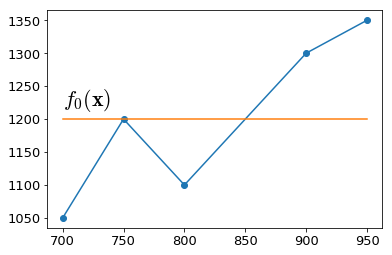

In [3]:
#rc('font',**{'family':'sans-serif'})
plt.plot(df.sqfeet,df.rent,'-o')
f0 = df.rent.mean()
print(f0)

plt.plot([df.sqfeet.min(),df.sqfeet.max()], [f0,f0])
plt.text(df.sqfeet.min(), f0+20, r"$f_0({\bf x})$",
        fontsize=22)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

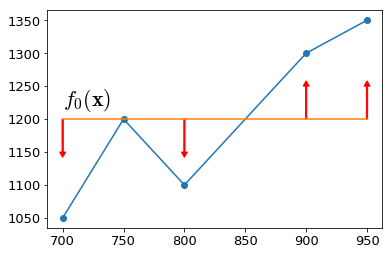

In [4]:
plt.plot(df.sqfeet,df.rent,'-o')
f0 = df.rent.mean()
plt.plot([df.sqfeet.min(),df.sqfeet.max()], [f0,f0])
plt.text(df.sqfeet.min(), f0+20, r"$f_0({\bf x})$",
         fontsize=22)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
dir = np.sign(df.rent - f0) * 50
for x,y_hat in zip(df.sqfeet,dir):
    if y_hat!=0:
        plt.arrow(x, f0, 0, y_hat, fc='r', ec='r',
                  width=1.0,
                 head_width=5, head_length=8)
plt.show()

In [5]:
df['f0'] = f0
df['delta1'] = np.sign(df.rent - df.f0)
df['scaled1'] = df.delta1 * 50
df['delta2'] = np.sign(df.rent - (df.f0 + df.scaled1))
df['scaled2'] = df.delta2 * 50
df['delta3'] = np.sign(df.rent - (df.f0 + df.scaled1 + df.scaled2))
df['scaled3'] = df.delta3 * 50
df['delta4'] = np.sign(df.rent - (df.f0 + df.scaled1 + df.scaled2 + df.scaled3))
df

,sqfeet,rent,f0,delta1,scaled1,delta2,scaled2,delta3,scaled3,delta4
0,700,1050,1200.0,-1.0,-50.0,-1.0,-50.0,-1.0,-50.0,0.0
4,750,1200,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,800,1100,1200.0,-1.0,-50.0,-1.0,-50.0,0.0,0.0,0.0
3,900,1300,1200.0,1.0,50.0,1.0,50.0,0.0,0.0,0.0
1,950,1350,1200.0,1.0,50.0,1.0,50.0,1.0,50.0,0.0


1200.0


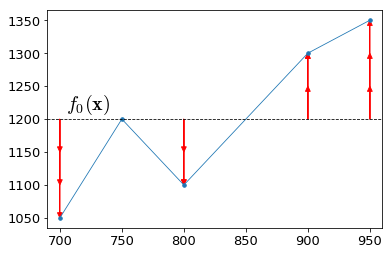

In [83]:
plt.plot(df.sqfeet,df.rent,'-o', linewidth=.8, markersize=3.5)
f0 = df.rent.mean()
print(f0)
plt.plot([df.sqfeet.min()-10,df.sqfeet.max()+10], [f0,f0],
         linewidth=.8, linestyle='--', c='k')
plt.xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)
plt.text(df.sqfeet.min()+5, f0+15, r"$f_0({\bf x})$",
         fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
dir = np.sign(df.rent - f0) * 50
stage = 1
y_hat = np.array
for x,y_hat in zip(df.sqfeet,df.scaled1):
    if y_hat!=0:
        plt.arrow(x, f0, 0, y_hat, fc='r', ec='r',
                  linewidth=0.8,
                 head_width=4, head_length=8,
                  length_includes_head=True)

for x,y_hat in zip(df.sqfeet,df.scaled1+df.scaled2):
    if y_hat!=0:
        plt.arrow(x, f0, 0, y_hat, fc='r', ec='r',
                  linewidth=.8,
                 head_width=4, head_length=8,
                  length_includes_head=True)

for x,y_hat in zip(df.sqfeet,df.scaled1+df.scaled2+df.scaled3):
    if y_hat!=0:
        plt.arrow(x, f0, 0, y_hat, fc='r', ec='r',
                  linewidth=.8,
                 head_width=4, head_length=8,
                  length_includes_head=True)
plt.savefig('/tmp/t.svg')
plt.show()